# Correction of practice 10

In [1]:
import numpy as np
import sklearn.linear_model as skmod

In [2]:
x1 = [6, 10, 2, 3, 4, 0, 7, 8, 9, 1]
y = [130, 21, 43, 76, 105, 3, 167, 162, 91, 15]
arr_x1 = np.array(x1).reshape(-1,1)
print(arr_x1)
arr_y = np.array(y).reshape(-1,1)
print(arr_y)
arr_x2 = arr_x1**2
arr_x3 = arr_x1**3
print(arr_x2)
print(arr_x3)

[[ 6]
 [10]
 [ 2]
 [ 3]
 [ 4]
 [ 0]
 [ 7]
 [ 8]
 [ 9]
 [ 1]]
[[130]
 [ 21]
 [ 43]
 [ 76]
 [105]
 [  3]
 [167]
 [162]
 [ 91]
 [ 15]]
[[ 36]
 [100]
 [  4]
 [  9]
 [ 16]
 [  0]
 [ 49]
 [ 64]
 [ 81]
 [  1]]
[[ 216]
 [1000]
 [   8]
 [  27]
 [  64]
 [   0]
 [ 343]
 [ 512]
 [ 729]
 [   1]]


In [3]:
model = skmod.LinearRegression()
model = model.fit(arr_x1, arr_y)
print("Eq: {:.2f}*x + {:.2f}".format(model.coef_[0][0], model.intercept_[0]) )
print("score is : {:.2f}".format(model.score(arr_x1, arr_y)))

Eq: 8.71*x + 37.75
score is : 0.26


In [4]:
#degree2
arr_x12 = np.hstack([arr_x1, arr_x2])
model2 = skmod.LinearRegression().fit(arr_x12, arr_y)
print("Eq: {:.2f}*x + {:.2f}*x**2 + {:.2f}".format(model2.coef_[0][0],
                                                   model2.coef_[0][1], 
                                                   model2.intercept_[0]))
print("score is : {:.2f}".format(model2.score(arr_x12, arr_y)))

Eq: 56.77*x + -4.81*x**2 + -29.53
score is : 0.79


In [5]:
#degree3
arr_x123 = np.hstack([arr_x1, arr_x2, arr_x3])
model3 = skmod.LinearRegression().fit(arr_x123, arr_y)
print("Eq: {:.2f}*x + {:.2f}*x**2 +{:.2f}*x**3 + {:.2f}".format(
                                                    model3.coef_[0][0],
                                                   model3.coef_[0][1],
                                                   model3.coef_[0][2],
                                                   model3.intercept_[0]))
print("score is : {:.2f}".format(model3.score(arr_x123, arr_y)))

Eq: 1.47*x + 9.70*x**2 +-0.97*x**3 + 5.27
score is : 0.96


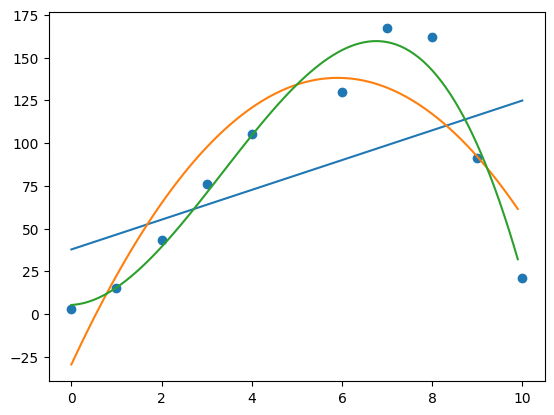

In [6]:
import matplotlib.pyplot as plt
plt.scatter(arr_x1, arr_y)
plt.plot([0,10], model.predict(np.array([[0], [10]])))
x_for_plot = np.arange(0,10,0.1).reshape(-1,1) #like range
x2_for_plot = x_for_plot**2
plt.plot(x_for_plot, model2.predict(np.hstack([x_for_plot, x2_for_plot])))
x3_for_plot = x_for_plot**3
plt.plot(x_for_plot, model3.predict(np.hstack([x_for_plot, x2_for_plot, x3_for_plot])))
plt.show()

# Lecture 11: Machine Learning III

In [7]:
#import some package
import numpy as np
import sklearn.linear_model as skmod
import sklearn.preprocessing as skprepro
import sklearn.model_selection as sksel
import matplotlib.pyplot as plt

## The polynomial features object

In [8]:
#Create data and reshape it
x1 = [6, 10, 2, 3, 4, 0, 7, 8, 9, 1]
arr_x1 = np.array(x1).reshape(-1,1)
print(arr_x1)

[[ 6]
 [10]
 [ 2]
 [ 3]
 [ 4]
 [ 0]
 [ 7]
 [ 8]
 [ 9]
 [ 1]]


In [9]:
#Create the polynomial feature object from the preprocessing module
#PolynomialFeatures() function
#choose the degree and don't include bias
poly2 = skprepro.PolynomialFeatures(degree = 2, include_bias = False)

In [10]:
#Transform your data into fetaures of degree two, fit_transform() function
arr_x_poly = poly2.fit_transform(arr_x1)
print(arr_x_poly)

[[  6.  36.]
 [ 10. 100.]
 [  2.   4.]
 [  3.   9.]
 [  4.  16.]
 [  0.   0.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]
 [  1.   1.]]


In [11]:
#Your turn (10 minutes)
#From the data of practice, make a polynomial regression of degree 8
#print the coef of the model
#degree2
# arr_x12 = np.hstack([arr_x1, arr_x2]) #replace this line
#create polynomial object
poly8 = skprepro.PolynomialFeatures(8, include_bias = False)

y = [130, 21, 43, 76, 105, 3, 167, 162, 91, 15]
arr_y = np.array(y).reshape(-1,1)
#model:
model = skmod.LinearRegression().fit(poly8.fit_transform(arr_x1), arr_y)
#print coef
print(model.coef_)

[[ 4.64288598e+01 -8.12079564e+01  6.74485351e+01 -2.38710228e+01
   4.20411225e+00 -3.74085552e-01  1.49833988e-02 -1.72233196e-04]]


## Train and test set

[[ 4.73211513]
 [11.22264267]
 [12.95664498]
 [13.78591719]
 [ 8.40973988]
 [ 6.19034771]
 [10.74044289]
 [ 8.12445291]
 [ 8.01460802]
 [ 7.95287196]
 [ 7.84995304]
 [-1.60315846]
 [12.11605084]
 [ 6.53621289]
 [ 3.58077475]
 [ 9.76457318]
 [15.83050561]
 [13.05614092]
 [ 3.00630166]
 [ 7.96144917]
 [ 5.63087026]
 [11.64231064]
 [11.62508305]
 [16.42119541]
 [ 6.25702591]
 [ 6.13230993]
 [-1.04665285]
 [ 8.99170832]
 [ 8.41665297]
 [ 7.99276862]
 [ 3.25448684]
 [ 8.69412113]
 [ 7.01229363]
 [ 6.27908172]
 [ 7.92521458]
 [12.82597199]
 [16.19104985]
 [ 3.96368514]
 [ 5.37238697]
 [ 8.54910172]
 [11.9739578 ]
 [ 7.57520078]
 [ 8.70149963]
 [ 7.58402141]
 [ 6.95749809]
 [ 9.61757868]
 [11.42856673]
 [ 9.24619702]
 [12.18050634]
 [ 9.2631357 ]
 [14.64364397]
 [10.36522101]
 [ 6.15275138]
 [ 5.59267788]
 [19.06117949]
 [12.5003795 ]
 [-0.20819166]
 [ 9.66693679]
 [ 2.4321457 ]
 [10.01656779]
 [11.672399  ]
 [12.66004218]
 [ 3.66775217]
 [10.03123972]
 [ 9.3552734 ]
 [ 6.00619501]
 [10.86336

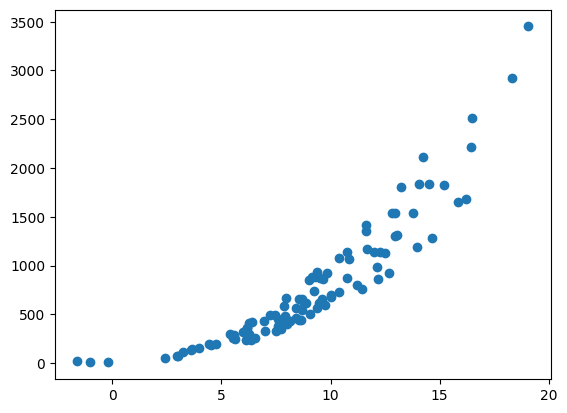

In [12]:
#let's create data, you can check this code at home
data_x = np.random.normal(9, 4, 100)
data_y = np.random.randint(70,130, size = (len(data_x)))/100*(data_x*data_x*8 + 2*data_x + 5)
plt.scatter(data_x, data_y)
data_x = data_x.reshape(-1,1)
data_y = data_y.reshape(-1,1)
print(data_x)
print(data_y)

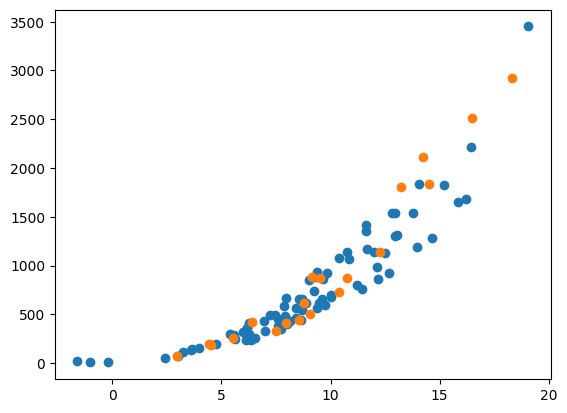

In [13]:
#Let's keep 20 % of our data aside
data_x_train = data_x[:80]
data_x_test = data_x[80:]
data_y_train = data_y[:80]
data_y_test = data_y[80:]
plt.scatter(data_x_train, data_y_train)
plt.scatter(data_x_test, data_y_test)

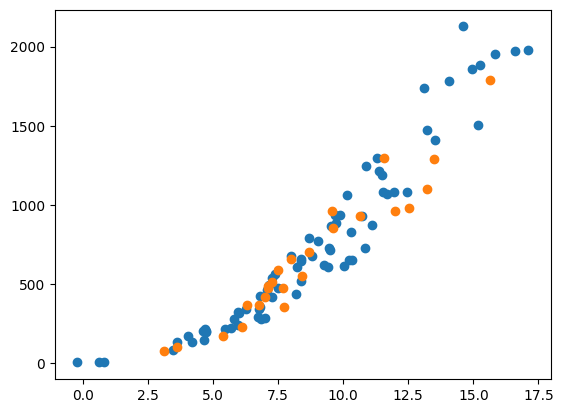

In [35]:
#choose a test and train set with scikit-learn:
#import sklearn.model_selection and use the train_test_split() function
#The order is train/test, train/test
import sklearn.model_selection as sksel
data_x_train, data_x_test, data_y_train, data_y_test = \
                        sksel.train_test_split(data_x, 
                                               data_y, 
                                               train_size = 0.75, 
                                               shuffle = True)

plt.scatter(data_x_train, data_y_train)
plt.scatter(data_x_test, data_y_test)

In [36]:
#Let's use the Polynomial transform of the sklearn.preprocessing module
poly2 = skprepro.PolynomialFeatures(2, include_bias = False)
data_x_train_poly2 = poly2.fit_transform(data_x_train)
data_x_test_poly2 = poly2.fit_transform(data_x_test)

In [37]:
#let's make our regression of degree 2
model2 = skmod.LinearRegression().fit(data_x_train_poly2, data_y_train)

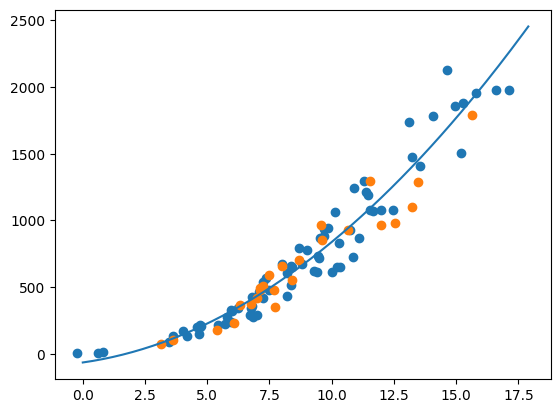

In [38]:
#Let's plot our result
plt.scatter(data_x_train, data_y_train)
plt.scatter(data_x_test, data_y_test)
plt.plot(np.arange(0,18,0.1), model2.predict(poly2.fit_transform(np.arange(0,18,0.1).reshape(-1,1))))

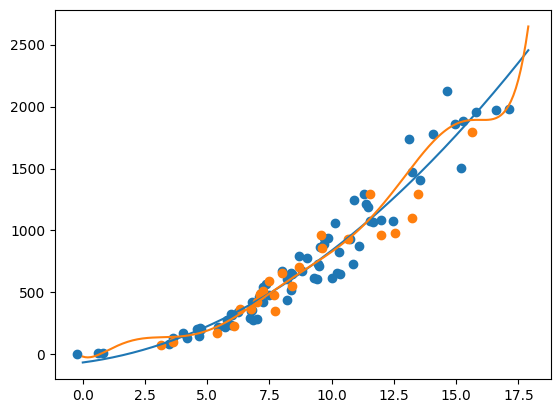

In [39]:
#Let's do for all regression for degree 8
poly8 = skprepro.PolynomialFeatures(8, include_bias = False)
data_x_train_poly8 = poly8.fit_transform(data_x_train)
data_x_test_poly8 = poly8.fit_transform(data_x_test)
model8 = skmod.LinearRegression().fit(data_x_train_poly8, data_y_train)
plt.scatter(data_x_train, data_y_train)
plt.scatter(data_x_test, data_y_test)
plt.plot(np.arange(0,18,0.1), model2.predict(poly2.fit_transform(np.arange(0,18,0.1).reshape(-1,1))))
plt.plot(np.arange(0,18,0.1), model8.predict(poly8.fit_transform(np.arange(0,18,0.1).reshape(-1,1))))

In [16]:
#Result of our model of the training set: the score function 
#(1 = perfect fitting, 0 = no fitting at all)
print("Training :", model2.score(data_x_train_poly2, data_y_train))
print("Testing :", model2.score(data_x_test_poly2, data_y_test))
print('-'*20)
print("Training :", model8.score(data_x_train_poly8, data_y_train))
print("Testing :", model8.score(data_x_test_poly8, data_y_test))

Training : 0.9525622608759696
Testing : 0.940534315895804
--------------------
Training : 0.9556787459346476
Testing : 0.4403113152638999


In [139]:
'''
Result of several runs

'''

'\nResult of several runs\n\n'

## Values scaling

### The logic behind scaling

In [40]:
#Create two features with different size with random (use function np.random.randint())
data_x1 = np.random.randint(10000, 20000, size = (20))
data_x2 = np.random.randint(0, 10, size = (20))
print(data_x1)
print(data_x2)

[16936 11024 11883 15351 17868 14079 18354 14885 12545 13146 18490 11024
 10939 18203 10280 12146 12256 11215 17246 16354]
[5 3 0 9 3 4 4 4 4 1 0 9 8 7 6 2 0 7 6 8]


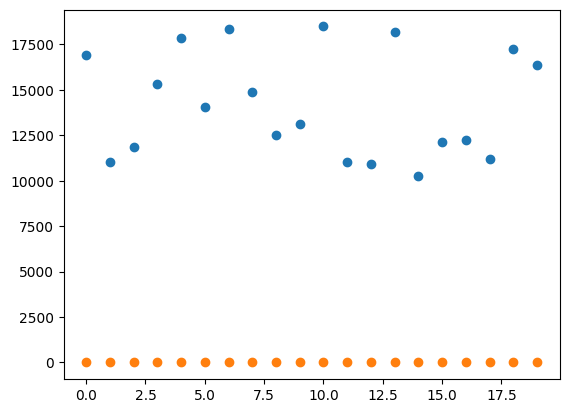

In [41]:
#Let's try to plot it together
plt.scatter(range(20), data_x1)
plt.scatter(range(20), data_x2)

In [42]:
#We can scale our data with normalization ((x - xmin)/(xmax - xmin))
data_x1_norm = (data_x1 - min(data_x1))/(max(data_x1)- min(data_x1))
data_x2_norm = (data_x2 - min(data_x2))/(max(data_x2)- min(data_x2))

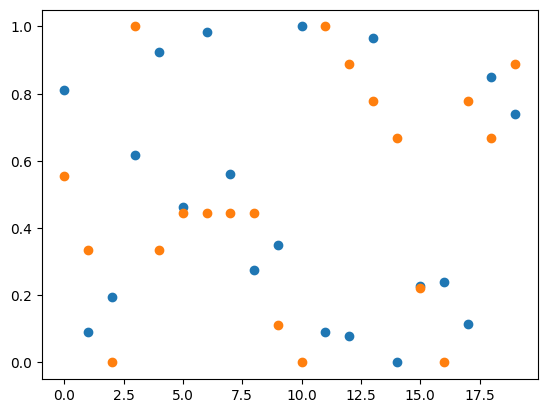

In [43]:
#Let's plot it again

plt.scatter(range(20), data_x1_norm)
plt.scatter(range(20), data_x2_norm)

In [44]:
#We can scale our data with standardization
data_x1_stan = (data_x1 - np.mean(data_x1))/np.std(data_x1)
data_x2_stan = (data_x2 - np.mean(data_x2))/np.std(data_x2)

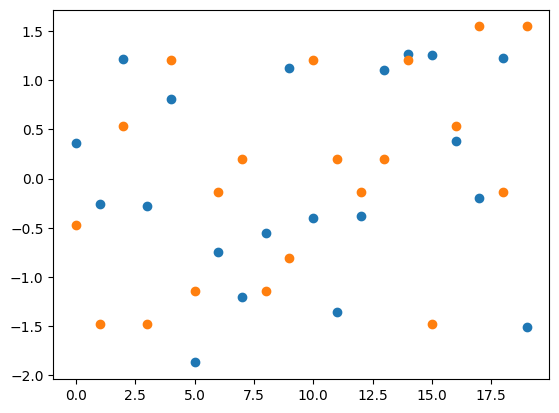

In [22]:
#we can now plot our data
plt.scatter(range(20), data_x1_stan)
plt.scatter(range(20), data_x2_stan)

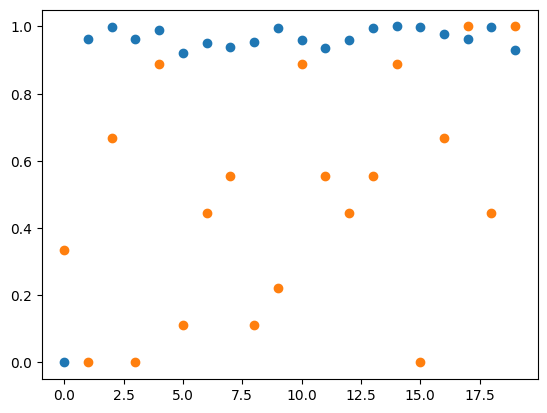

(-1.1, 1.1)

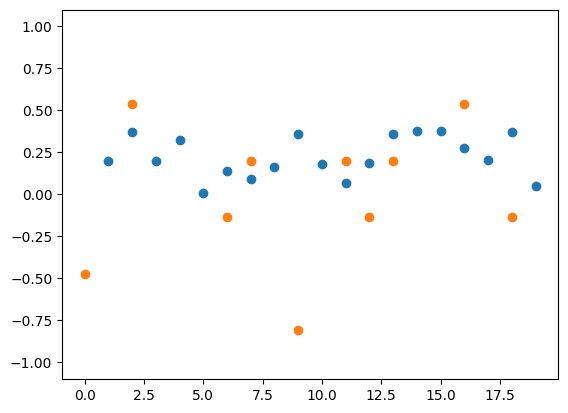

In [23]:
#The difference between normalisation and standardization when there is outliers
#Let's plot it
data_x1[0] = -100_000
data_x1_norm = (data_x1 - min(data_x1))/(max(data_x1)- min(data_x1))
data_x2_norm = (data_x2 - min(data_x2))/(max(data_x2)- min(data_x2))
plt.scatter(range(20), data_x1_norm)
plt.scatter(range(20), data_x2_norm)
plt.show()
data_x1_stan = (data_x1 - np.mean(data_x1))/np.std(data_x1)
data_x2_stan = (data_x2 - np.mean(data_x2))/np.std(data_x2)
plt.scatter(range(20), data_x1_stan)
plt.scatter(range(20), data_x2_stan)
plt.ylim(-1.1,1.1)

### The scikit-learn object

In [45]:
#Create the scaler object StandardScaler() object
scaler = skprepro.StandardScaler()

In [46]:
#prepare our data: 2 columns because 2 features
data_x = np.hstack([data_x1.reshape(-1,1), data_x2.reshape(-1,1)])
print(data_x)

[[16936     5]
 [11024     3]
 [11883     0]
 [15351     9]
 [17868     3]
 [14079     4]
 [18354     4]
 [14885     4]
 [12545     4]
 [13146     1]
 [18490     0]
 [11024     9]
 [10939     8]
 [18203     7]
 [10280     6]
 [12146     2]
 [12256     0]
 [11215     7]
 [17246     6]
 [16354     8]]


In [48]:
#use it on your data with the fit(), transform(), fit_transform()
scaler_f = scaler.fit(data_x)
data_x_stan = scaler_f.transform(data_x)
# print(data_x_stan)
print(scaler_f.transform([[5, 5]]))

[[-5.01249582  0.17303214]]


In [49]:
#Use inverse_transform method to come back for standardized data to real data
print(scaler.inverse_transform([[0.01, 0.01]]))

[[1.42395416e+04 4.52889637e+00]]


In [50]:
#YOUR TURN (10 minutes)
#On the file in Teams (use copy past to transfer it in python), 
#tranform the three lists in a 10*3 matrix of standardized features
l1 = np.array([22, 85, 96, 81, 68, 97, 29, 61, 73, 86])
l2 = np.array([1489022, 1073767, 1975250, 1493073, 1063635, 1017921, 1206827, 1217274, 1933018, 1325618])
l3 = np.array([-99.67, -99.37, -99.08, -99.54, -99.8, -99.21, -99.73, -99.78, -99.6, -99.48])
l = np.hstack([l1.reshape(-1,1), l2.reshape(-1,1), l3.reshape(-1,1) ])
scaler_f = skprepro.StandardScaler()
# scaler_f = scaler.fit(l)
# l_stan = scaler.transform(l)
l_stan = scaler_f.fit_transform(l)
print(l_stan)

[[-1.93765385  0.33481781 -0.62382688]
 [ 0.61615771 -0.93512067  0.67581245]
 [ 1.06206131  1.82180687  1.93213047]
 [ 0.45401094  0.34720663 -0.06064984]
 [-0.07296604 -0.96610649 -1.18700392]
 [ 1.10259801 -1.10590966  1.36895343]
 [-1.65389701 -0.52819477 -0.88375474]
 [-0.35672288 -0.49624561 -1.1003613 ]
 [ 0.12971741  1.6926524  -0.3205777 ]
 [ 0.6566944  -0.16490652  0.19927803]]


In [51]:
#YOUR TURN (10 minutes)
#Make a linear regression with the three features (l1, l2 and l3) and the label (l4)
#with standardized and non-standardized features
# what is the prediction of both model for fatures: [30, 1600000, -99.5]
l4 = np.array([-182, -254.3,  -71  , -172, -261 , -262, -237, -231, -85, -204])
l4 = l4.reshape(-1,1)
scaler_l = skprepro.StandardScaler()
l4_stan = scaler_l.fit_transform(l4)
print(l4_stan)

[[ 0.21079983]
 [-0.88330123]
 [ 1.89054004]
 [ 0.36212778]
 [-0.98469095]
 [-0.99982374]
 [-0.62150388]
 [-0.53070711]
 [ 1.67868091]
 [-0.12212165]]


In [187]:
model = skmod.LinearRegression().fit(l_stan, l4_stan)
x_predict =  [30, 1600000, -99.5]

In [193]:
# x_predict =  np.array([30, 1600000, -99.5]).reshape(-1,1)
x_predict_stan = scaler_f.transform(np.array([[30, 1600000, -99.5]]))
print(x_predict_stan)
y_predict_stan = model.predict(x_predict_stan)
print(scaler_l.inverse_transform(y_predict_stan))


[[-1.61336032  0.67421223  0.11263541]]
[[-157.47748455]]
